Epoch 1/100
4/4 [==============================] - 1s 45ms/step - loss: 0.0591 - val_loss: 0.0313
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0317 - val_loss: 0.0168
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0178 - val_loss: 0.0076
Epoch 4/100
4/4 [==============================] - 0s 29ms/step - loss: 0.0110 - val_loss: 0.0050
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0094 - val_loss: 0.0048
Epoch 6/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0089 - val_loss: 0.0043
Epoch 7/100
4/4 [==============================] - 1s 232ms/step - loss: 0.0081 - val_loss: 0.0041
Epoch 8/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0075 - val_loss: 0.0038
Epoch 9/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0067 - val_loss: 0.0033
Epoch 10/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0062 - val_loss: 0.0031
Epoch 11/100
4/4 [====

4/4 [==============================] - 0s 9ms/step - loss: 0.0010 - val_loss: 0.0018
Epoch 85/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0010 - val_loss: 0.0018
Epoch 86/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0010 - val_loss: 0.0018
Epoch 87/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0010 - val_loss: 0.0018
Epoch 88/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0010 - val_loss: 0.0018
Epoch 89/100
4/4 [==============================] - 0s 67ms/step - loss: 0.0010 - val_loss: 0.0018
Epoch 90/100
4/4 [==============================] - 0s 12ms/step - loss: 9.8005e-04 - val_loss: 0.0018
Epoch 91/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0010 - val_loss: 0.0018
Epoch 92/100
4/4 [==============================] - 0s 16ms/step - loss: 9.8422e-04 - val_loss: 0.0018
Epoch 93/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0010 - val_loss: 0.0018
Epoch 94/100
4/4 [=

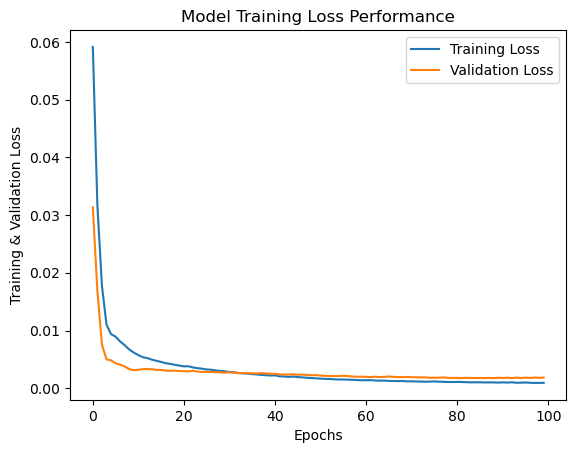

1/1 [==============================] - 0s 66ms/step
Expected Selling Price: 5424.097


/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
df=pd.read_csv('c:/Users/NrDiv/OneDrive/Desktop/cardata1.csv')
# Drop irrelevant columns and separate features and target variable
X = df.drop(['Car_Name', 'Selling_Price'], axis=1)
y = df['Selling_Price']

# Encode categorical variables
X = pd.get_dummies(X, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)

# Standardize the feature set
scaler_X = MinMaxScaler()
X_std = scaler_X.fit_transform(X)

# Scaling target variable
scaler_y = MinMaxScaler()
y_std = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential()
model.add(Dense(40, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=1, validation_split=0.2)

# Plot training and validation loss
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Training Loss Performance')
plt.xlabel('Epochs')
plt.ylabel('Training & Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

# Prediction on new data
X_new = np.array([[2020, 8.0, 10000, 5000, 1, 0, 0, 1]])  # Adjust features as needed
X_new_std = scaler_X.transform(X_new)
y_predict = model.predict(X_new_std)
y_predict_original = scaler_y.inverse_transform(y_predict)

print('Expected Selling Price:', y_predict_original[0][0])